In [3]:
from scapy.all import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [4]:
paquetes = rdpcap('../datos/sniff_casa_franco.cap')

In [2]:
paquetes = rdpcap('../datos/sniff_casa_fede.cap')

In [38]:
paquetes = rdpcap('../datos/sniff_wifi_labo_filtrado.cap')

In [5]:
# Ethernet

freq = {}
paquetes = paquetes.filter(lambda pkt: pkt.getlayer(1) != None and Ether in pkt)
for pkt in paquetes:
    
    tipo = 'broadcast' if pkt[Ether].dst == 'ff:ff:ff:ff:ff:ff' else 'unicast'
    proto = pkt.getlayer(1).name

    freq[(tipo,proto)] = freq[(tipo,proto)] + 1 if (tipo,proto) in freq else 1

In [39]:
# Wifi

freq = {}
paquetes = paquetes.filter(lambda pkt: SNAP in pkt)
for pkt in paquetes:
    
    tipo = 'broadcast' if pkt[Dot11].addr1 == 'ff:ff:ff:ff:ff:ff' else 'unicast'
    proto = pkt.getlayer(SNAP).getlayer(1).name

    freq[(tipo,proto)] = freq[(tipo,proto)] + 1 if (tipo,proto) in freq else 1

In [6]:
entropia = 0
for k in freq:
        p = freq[k] / len(paquetes) 
        entropia += -p * math.log(p)
        

max_entropia = math.log(len(freq))

In [7]:
tablainfo = pd.Series(data = freq).to_frame(name = "Cantidad de Paquetes")
tablainfo.index = tablainfo.index.set_names(["Tipo","Protocolo"])
tablainfo['Probabilidad'] = tablainfo['Cantidad de Paquetes'].apply(lambda x: x / len(paquetes))
tablainfo['Información [Bits]'] = tablainfo['Cantidad de Paquetes'].apply(lambda x: np.log(len(paquetes)/x))
tablainfo.sort_values('Información [Bits]', inplace = True, ascending = False)
print(tablainfo)
print()
print(tablainfo.to_latex())

                     Cantidad de Paquetes  Probabilidad  Información [Bits]
Tipo      Protocolo                                                        
unicast   LLC                           1      0.000100            9.208138
          EAPOL                        16      0.001604            6.435549
broadcast IP                          273      0.027360            3.598666
          ARP                         483      0.048406            3.028121
unicast   IPv6                       1284      0.128683            2.050402
          ARP                        2246      0.225095            1.491232
          IP                         5675      0.568751            0.564312

\begin{tabular}{llrrr}
\toprule
          &     &  Cantidad de Paquetes &  Probabilidad &  Información [Bits] \\
Tipo & Protocolo &                       &               &                     \\
\midrule
unicast & LLC &                     1 &      0.000100 &            9.208138 \\
          & EAPOL &             

In [8]:
tablaentropia = pd.Series({'Entropia fuente': entropia, 'Entropía máxima': max_entropia}).to_frame(name = "Información [Bits]")
print(tablaentropia)
print()
print(tablaentropia.to_latex())

                 Información [Bits]
Entropia fuente            1.176758
Entropía máxima            1.945910

\begin{tabular}{lr}
\toprule
{} &  Información [Bits] \\
\midrule
Entropia fuente &            1.176758 \\
Entropía máxima &            1.945910 \\
\bottomrule
\end{tabular}



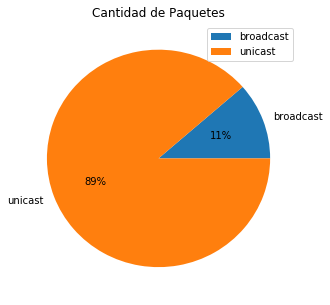

In [43]:
unibroad = pd.Series(data = freq).to_frame(name = "Cantidad de Paquetes").reset_index(level = 1, drop = True)
unibroad = unibroad.reset_index().groupby('index').agg('sum')
ax = unibroad.plot(y = 'Cantidad de Paquetes', kind = 'pie', autopct='%1.0f%%', title='Cantidad de Paquetes', figsize=(5,5))
ax.set_ylabel('')

plt.show()

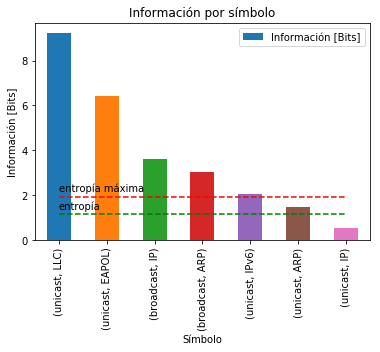

In [12]:
ax = tablainfo.plot(y = 'Información [Bits]', kind = 'bar', title = 'Información por símbolo')
ax.set_ylabel('Información [Bits]')
ax.set_xlabel('Símbolo')
ax.plot([0, len(freq.keys())-1], [entropia, entropia], "g--")
ax.annotate("entropía", (0, entropia + 0.2))
ax.plot([0, len(freq.keys())-1], [max_entropia, max_entropia], "r--")
ax.annotate("entropía máxima", (0, max_entropia + 0.2))
plt.show()